# <font color='blue'>Deals e Leads</font>
________________

<p>Autor: Paulo Alozen</p>
<p>Data: 12.02.2019</p>
<p>Data Prevista Entrega: 01.04.2019</p>


## Descrição do problema:
______
<p> Utilizar os dados de Deals da área comercial em conjunto com os dados de Leads da área de marketing para 
atingir os seguinte objetivos:</p>

<p>1) Classificar em grupos por semelhança, os dados de deals/leads (Clusterização);</p>
<p>2) Definir qual os principais fatores para a conversão dos leads por vendas;</p>
<p>3) Modelo com o score de probabilidade para converter um lead em uma venda;</p>

## <font color='blue'> Índice:</font>

* [1. Leitura e entendimento do arquivo](#leitura)
* [2. Ajuste dos tipo de dados](#ajuste_dados)
* [3. Derivação de novos campos](#derivacao_campos)


<h2><a id="leitura" class="anchor">1 - Leitura e Entendimento do Arquivo</a></h2>

In [1]:
# Bibliotecas:
import pandas as pd

# Configurações Jupyter Notebooks
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

# Ler arquivo Deals
df_deals = pd.read_csv('arquivos/deals_v2.csv', sep=';')

# Shape arquivo Deals
print("Número de linhas: " + str(df_deals.shape[0]))
print("Número de Colunas: " + str(df_deals.shape[1]))

Número de linhas: 1843
Número de Colunas: 95


In [2]:
# Verificar arquivo:
df_deals.head()

,stage,title,value,implementacao,volume_de_admissoes_mensal,numero_de_funcionarios,won_time,owner,pipeline,lost_reason,interesse,origem_do_deal,status,motivo_de_perda_detalhado,mercado,expectativa_de_produto,activities_to_do,banco_parceiro_pgt,contact_person,creator,done_activities,email_messages_count,organization,probability,qtd_clts,sistema_de_folha_de_pgto,sistema_de_ponto,source,source1,tem_adiantamento,tem_conta,total_activities,currency,visible_to,weighted_value,deal_created_date,deal_created_year,deal_created_month,deal_created_day,deal_created_quarter,deal_created_weekday,lost_time_date,lost_time_year,lost_time_month,lost_time_day,lost_time_quarter,lost_time_weekday,last_activity_date_date,last_activity_date_year,last_activity_date_month,last_activity_date_day,last_activity_date_quarter,last_activity_date_weekday,last_email_received_date,last_email_received_year,last_email_received_month,last_email_received_day,last_email_received_quarter,last_email_received_weekday,last_email_sent_date,last_email_sent_year,last_email_sent_month,last_email_sent_day,last_email_sent_quarter,last_email_sent_weekday,last_stage_change_date,last_stage_change_year,last_stage_change_month,last_stage_change_day,last_stage_change_quarter,last_stage_change_weekday,expected_close_date_date,expected_close_date_year,expected_close_date_month,expected_close_date_day,expected_close_date_quarter,expected_close_date_weekday,deal_closed_on_date,deal_closed_on_year,deal_closed_on_month,deal_closed_on_day,deal_closed_on_quarter,deal_closed_on_weekday,next_activity_date_date,next_activity_date_year,next_activity_date_month,next_activity_date_day,next_activity_date_quarter,next_activity_date_weekday,update_time_date,update_time_year,update_time_month,update_time_day,update_time_quarter,update_time_weekday
0,Compromisso,Ipiranga,1400.0,NaN,50.0,3500.0,NaN,Guilherme Salam,Canal Direto,Não atendeu as expectativas,Admissão,Inbound,Lost,Precisa integrar com FPW,Varejo,NaN,1,NaN,Alice Xavier,Guilherme Salam,15,18,Ipiranga,NaN,NaN,FPW,NaN,NaN,NaN,NaN,NaN,16,BRL,Entire company,"532,00 BRL",2018-11-06,2018,11,6,4,1,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2018-12-11,2018.0,12.0,11.0,4.0,1.0,2018-11-14,2018.0,11.0,14.0,4.0,2.0,2018-11-22,2018.0,11.0,22.0,4.0,3.0,2018-11-12,2018.0,11.0,12.0,4.0,0.0,2019-02-28,2019.0,2.0,28.0,1.0,3.0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2019-02-19,2019.0,2.0,19.0,1.0,1.0,2019-01-23,2019,1,23,1,2
1,Proposta Comercial,Lab. Exame,1000.0,2500.0,12.0,105.0,NaN,Adriana Campos,Canal Direto,Não atendeu as expectativas,Plano Completo,Inbound,Lost,Queria um sistema que subisse recibo de ferias...,Saúde,"Férias - Recibo de férias, Férias - Aviso sobr...",0,NaN,Elizângela Alvarenga,Henrique Carvalho,12,8,Lab. Exame,NaN,NaN,Contabilidade Externa,NaN,NaN,NaN,NaN,NaN,12,BRL,Entire company,"540,00 BRL",2018-12-03,2018,12,3,4,0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2019-01-22,2019.0,1.0,22.0,1.0,1.0,2019-01-15,2019.0,1.0,15.0,1.0,1.0,2019-01-15,2019.0,1.0,15.0,1.0,1.0,2018-12-10,2018.0,12.0,10.0,4.0,0.0,2019-01-31,2019.0,1.0,31.0,1.0,3.0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-23,2019,1,23,1,2
2,Conexão,DTintas,1950.0,NaN,5.0,35.0,NaN,Tamiris Januário,Canal Direto,Não tem budget,"Holerites, Plano Completo",Inbound,Lost,NaN,NaN,NaN,0,NaN,Raquel,Tamiris Januário,6,2,DTintas,NaN,NaN,Contabilidade Externa,NaN,NaN,NaN,NaN,NaN,6,BRL,Entire company,"351,00 BRL",2019-01-21,2019,1,21,1,0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2019-01-22,2019.0,1.0,22.0,1.0,1.0,2019-01-22,2019.0,1.0,22.0,1.0,1.0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019.0,2.0,28.0,1.0,3.0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-23,2019,1,23,1,2
3,Proposta Comercial,[Contably] Três Contas,900.0,3500.0,3.0,150.0,NaN,José Luiz Souza,Canal Direto,parceiro não avançou com op,Plano Completo,Parcerias,Lost,parceiro não avançou com op,Educacional,NaN,0,NaN,Rafael Contably,José Luiz Souza,3,0,Cotably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3

<h2><a id="ajuste_dados" class="anchor">2 - Ajuste dos tipos de Dados</a></h2>

In [3]:
# Tratar textos
df_deals_object = df_deals.select_dtypes('object')

def print_details(column_name):
    df_temp = df_deals.loc[:,[column_name,'currency']].groupby(column_name).count().reset_index()
    df_temp = df_temp.rename(columns={'currency':'qnt'}).sort_values('qnt',ascending=False)
    print("Quantidade de categorias: ", df_temp.shape[0])
    print(f"Quantidade de registros em branco: {df_deals[column_name].isna().sum()}\n")
    print(f'{df_temp} \n')

print_details('stage')

Quantidade de categorias:  17
Quantidade de registros em branco: 0

                  stage  qnt
4               Conexão  889
13   Proposta Comercial  234
15              Solução  158
9            Fechamento  157
2           Compromisso   83
7           Diagnóstico   77
10                Ganho   68
8           Em cadência   63
3             Conectado   34
14         Qualificação   23
0          Apresentação   20
1        Boleto Emitido   20
12             Proposta   10
6            Descoberta    3
11  Ok Formal p Janeiro    2
5          Demonstração    1
16    Validação Técnica    1 



In [4]:
df_deals['stage'] = df_deals['stage'].replace('Proposta', 'Proposta Comercial')
df_deals['stage'] = df_deals['stage'].replace('Conectado', 'Conexão')
print_details('stage')

Quantidade de categorias:  15
Quantidade de registros em branco: 0

                  stage  qnt
3               Conexão  923
11   Proposta Comercial  244
13              Solução  158
8            Fechamento  157
2           Compromisso   83
6           Diagnóstico   77
9                 Ganho   68
7           Em cadência   63
12         Qualificação   23
0          Apresentação   20
1        Boleto Emitido   20
5            Descoberta    3
10  Ok Formal p Janeiro    2
4          Demonstração    1
14    Validação Técnica    1 



In [5]:
# drop owner
df_deals = df_deals.drop('owner', axis = 1)
print_details('pipeline')

Quantidade de categorias:  4
Quantidade de registros em branco: 0

       pipeline   qnt
0  Canal Direto  1574
1      Outbound   186
2     Parceiros    46
3        Xerpay    37 



In [6]:
df_deals = df_deals.drop('won_time', axis=1)

In [7]:
print_details('lost_reason')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('Não é uma prioridade no momento', 'Não é uma prioridade')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('Perdemos para um concorrente', 'Perdemos para concorrência')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('sem contato', 'Sem Contato')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('sem Contato', 'Sem Contato')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('Sem resposta', 'Sem Contato')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('Deixou de responder', 'Sem Contato')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('Não é prioridade', 'Não é uma prioridade')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('Parou de responder', 'Sem Contato')
df_deals['lost_reason'] = df_deals['lost_reason'].replace('sem conttao', 'Sem Contato')

Quantidade de categorias:  190
Quantidade de registros em branco: 736

                                           lost_reason  qnt
63                                Não é uma prioridade  297
22                  Deals pendentes antigos da Hubspot  122
52                   Não quis dar sequência no contato  119
64                     Não é uma prioridade no momento   85
45                         Não atendeu as expectativas   76
71                          Perdemos para concorrência   54
56                                      Não tem perfil   27
94                                         Sem Contato   19
53                                      Não tem budget   17
109                                       Sem resposta   16
46                Não conseguiu aprovação internamente   13
72                        Perdemos para um concorrente   11
44                Não atendemos a tudo que ele precisa   11
169                                        sem contato    9
96                           

In [8]:
# aplicar para o dataset inteiro caixa_baixa/alta, acentuação, espaços
df_deals_object = df_deals.select_dtypes('object')

import re

def filterChar(char):
    if '*' not in char or '+' not in char or '?' not in char:
        return False
    return True

for c in df_deals_object.columns:
    for v in df_deals[c]:
        if not pd.isnull(v):
            v = ''.join(filter(filterChar, v))
            regex_pat = re.compile(r'' + v, flags=re.IGNORECASE)
            df_deals[c] = df_deals[c].replace(regex_pat, v.lower())
            
# df.apply()

# % de igualdade (dicionário) para agregar palavras

In [9]:
# print_details('interesse')
def createVarsByComma(varName):
    print(df_deals_object[varName])
    #df_deals_object[f'{varName}']

createVarsByComma('interesse')
#for c in df_deals_object.interesse:
#    if isinstance(c, str):
#        interests = c.split(',')
#        for i in interests:
#            if i[0] == ' ':
#                i = i.replace(' ', '', 1)
#            df_deals_object[f'interesse_{c}'] = 1
#    else:
#        df_deals_object[f'interesse_{c}'] = 0
# quebrar em variáveis de acordo com a vírgula

0                                            Admissão
1                                      Plano Completo
2                           Holerites, Plano Completo
3                                      Plano Completo
4                                      Plano Completo
5                                                 NaN
6                                                 NaN
7                                                 NaN
8                                            Admissão
9                            Admissão, Plano Completo
10                                           Admissão
11                                           Admissão
12                                           Admissão
13                                                NaN
14                                     Plano Completo
15                                           Admissão
16                                Admissão, Holerites
17                                             Xerpay
18                          

In [ ]:
print_details('origem_do_deal')

In [11]:
print_details('status')
# variável dependente e indepentende

Quantidade de categorias:  3
Quantidade de registros em branco:  0

  status   qnt
0   Lost  1318
1   Open   314
2    Won   211



In [39]:
print_details('motivo_de_perda_detalhado')
df_deals = df_deals.drop('motivo_de_perda_detalhado', axis=1)
# remover

Quantidade de categorias:  33
Quantidade de registros em branco:  1806

                            motivo_de_perda_detalhado  qnt
30                        parceiro não avançou com op    5
0   - acha que o crédito consignado vai ser mais s...    1
17     Operação iniciando, sem necessidade no momento    1
31  sem comprometimento não atende não da sinal e ...    1
29  estava fazendo um trabalho de apresentaçao com...    1
28  ela vai ter que viajar pra resolver um projeto...    1
27  diretor presidente faleceu um pouco antes do n...    1
26      cliente não vai avançar com novas negociações    1
25  Vai seguir com o pessoal ada Alelo, segundo el...    1
24                          Tinha dois deals abertos.    1
23  Queria uma solução que já englobasse o control...    1
22  Queria um sistema que subisse recibo de ferias...    1
21  Queria que tivesse um campo onde ela possa sub...    1
20                           Precisa integrar com FPW    1
19  Paula Amorim\n10:15 (Há 2 minutos)\npar

In [41]:
# excluir a variável
# talvez juntar com outra base através do email, pessoas de contato, nome da empresa
print_details('mercado')
df_deals = df_deals.drop('mercado', axis=1)

Quantidade de categorias:  21
Quantidade de registros em branco:  1297

             mercado  qnt
16        Tecnologia  129
14          Serviços   95
8          Indústria   45
19            Varejo   42
3        Educacional   35
12             Saúde   32
2      Contabilidade   28
11            Outros   27
0        Alimentação   22
5           Finanças   17
10         Marketing   14
9          Logística   13
18     Terceirização   12
1        Consultoria   11
13        Seguradora    7
15          Startups    6
4         Engenharia    6
7          Hotelaria    2
6          Hospitais    1
17  Telecomunicações    1
20         eCommerce    1



In [25]:
# LabelEncoder:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

df_deals_merc = df_deals[df_deals['mercado'].notnull()] 
print(df_deals.shape)
print(df_deals_merc.shape)

# df_deals['mercado_lb'] = lb_make.fit_transform(df_deals['mercado'])
# df_deals_merc['mercado_lb'] = lb_make.fit_transform(df_deals_merc['mercado'])

(1843, 95)
(546, 95)


In [26]:
# HotEncoding:
df_deals_merc = pd.get_dummies(df_deals_merc, columns=['mercado'], prefix = ['hot_mercado'])
print(df_deals.shape)
print(df_deals_merc.shape)
df_deals_merc.head()

(1843, 95)
(546, 115)


,stage,title,value,implementacao,volume_de_admissoes_mensal,numero_de_funcionarios,won_time,owner,pipeline,lost_reason,interesse,origem_do_deal,status,motivo_de_perda_detalhado,expectativa_de_produto,activities_to_do,banco_parceiro_pgt,contact_person,creator,done_activities,email_messages_count,organization,probability,qtd_clts,sistema_de_folha_de_pgto,sistema_de_ponto,source,source1,tem_adiantamento,tem_conta,total_activities,currency,visible_to,weighted_value,deal_created_date,deal_created_year,deal_created_month,deal_created_day,deal_created_quarter,deal_created_weekday,lost_time_date,lost_time_year,lost_time_month,lost_time_day,lost_time_quarter,lost_time_weekday,last_activity_date_date,last_activity_date_year,last_activity_date_month,last_activity_date_day,last_activity_date_quarter,last_activity_date_weekday,last_email_received_date,last_email_received_year,last_email_received_month,last_email_received_day,last_email_received_quarter,last_email_received_weekday,last_email_sent_date,last_email_sent_year,last_email_sent_month,last_email_sent_day,last_email_sent_quarter,last_email_sent_weekday,last_stage_change_date,last_stage_change_year,last_stage_change_month,last_stage_change_day,last_stage_change_quarter,last_stage_change_weekday,expected_close_date_date,expected_close_date_year,expected_close_date_month,expected_close_date_day,expected_close_date_quarter,expected_close_date_weekday,deal_closed_on_date,deal_closed_on_year,deal_closed_on_month,deal_closed_on_day,deal_closed_on_quarter,deal_closed_on_weekday,next_activity_date_date,next_activity_date_year,next_activity_date_month,next_activity_date_day,next_activity_date_quarter,next_activity_date_weekday,update_time_date,update_time_year,update_time_month,update_time_day,update_time_quarter,update_time_weekday,hot_mercado_Alimentação,hot_mercado_Consultoria,hot_mercado_Contabilidade,hot_mercado_Educacional,hot_mercado_Engenharia,hot_mercado_Finanças,hot_mercado_Hospitais,hot_mercado_Hotelaria,hot_mercado_Indústria,hot_mercado_Logística,hot_mercado_Marketing,hot_mercado_Outros,hot_mercado_Saúde,hot_mercado_Seguradora,hot_mercado_Serviços,hot_mercado_Startups,hot_mercado_Tecnologia,hot_mercado_Telecomunicações,hot_mercado_Terceirização,hot_mercado_Varejo,hot_mercado_eCommerce
0,Compromisso,Ipiranga,1400.0,NaN,50.0,3500.0,NaN,Guilherme Salam,Canal Direto,Não atendeu as expectativas,Admissão,Inbound,Lost,Precisa integrar com FPW,NaN,1,NaN,Alice Xavier,Guilherme Salam,15,18,Ipiranga,NaN,NaN,FPW,NaN,NaN,NaN,NaN,NaN,16,BRL,Entire company,"532,00 BRL",2018-11-06,2018,11,6,4,1,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2018-12-11,2018.0,12.0,11.0,4.0,1.0,2018-11-14,2018.0,11.0,14.0,4.0,2.0,2018-11-22,2018.0,11.0,22.0,4.0,3.0,2018-11-12,2018.0,11.0,12.0,4.0,0.0,2019-02-28,2019.0,2.0,28.0,1.0,3.0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2019-02-19,2019.0,2.0,19.0,1.0,1.0,2019-01-23,2019,1,23,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Proposta Comercial,Lab. Exame,1000.0,2500.0,12.0,105.0,NaN,Adriana Campos,Canal Direto,Não atendeu as expectativas,Plano Completo,Inbound,Lost,Queria um sistema que subisse recibo de ferias...,"Férias - Recibo de férias, Férias - Aviso sobr...",0,NaN,Elizângela Alvarenga,Henrique Carvalho,12,8,Lab. Exame,NaN,NaN,Contabilidade Externa,NaN,NaN,NaN,NaN,NaN,12,BRL,Entire company,"540,00 BRL",2018-12-03,2018,12,3,4,0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,2019-01-22,2019.0,1.0,22.0,1.0,1.0,2019-01-15,2019.0,1.0,15.0,1.0,1.0,2019-01-15,2019.0,1.0,15.0,1.0,1.0,2018-12-10,2018.0,12.0,10.0,4.0,0.0,2019-01-31,2019.0,1.0,31.0,1.0,3.0,2019-01-23,2019.0,1.0,23.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-23,2019,1,23,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Proposta Comercial,[Contably] Três Contas,900.0,3500.0,3.0,150.0,NaN,José Luiz Souza,Canal Direto,parceiro não avançou com op,Plano Completo,Parcerias,Lost,parceiro não avançou com op,NaN,0,NaN,Rafael Contably,José Luiz Souza,3,0,Cotably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,BRL,Entire company,"486,00 BRL",2018-12-10,2018,1

In [27]:
# Eliminar outliers
# Dados faltantes (substituição ou exclusão)
# df_deals['mercado'] = df_deals['mercado'].fillna('Outros')

In [28]:
import numpy as np

df_deals_num = df_deals.select_dtypes(['float64','int64'])
df_deals_num.dtypes

# Distribuição:
bins = 10
var = 'implementacao'

bin_values = np.arange(start=df_deals_num[var].min(), 
                       stop=df_deals_num[var].max(), 
                       step=((df_deals_num[var].max()-df_deals_num[var].min())/bins))

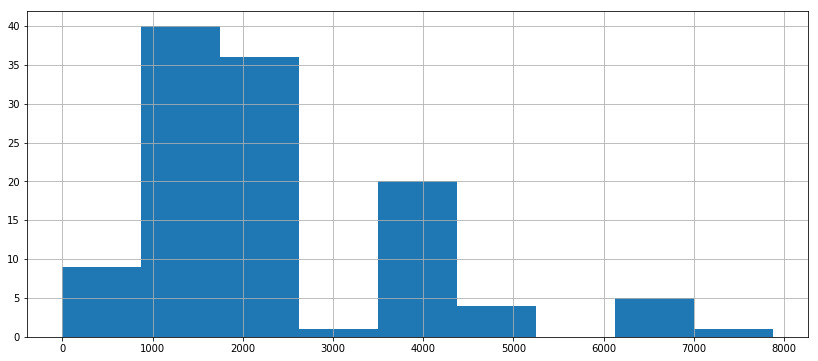

In [30]:
## chart about implementacao numbers
df_deals_num[var].hist(bins=bin_values, figsize=[14,6])

(1843, 61)
(685, 61)


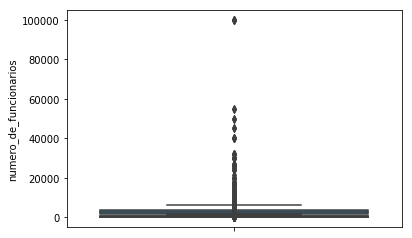

In [101]:
# BoxPlot:
import seaborn as sns
 
# Make boxplot for one group only

sns.boxplot(y=df_deals_num["update_time_month"])
sns.boxplot(y=df_deals_num["value"])
sns.boxplot(y=df_deals_num["implementacao"])
sns.boxplot(y=df_deals_num["volume_de_admissoes_mensal"])
sns.boxplot(y=df_deals_num["numero_de_funcionarios"])
sns.boxplot(y=df_deals_num["activities_to_do"])
sns.boxplot(y=df_deals_num["done_activities"])
sns.boxplot(y=df_deals_num["email_messages_count"])
sns.boxplot(y=df_deals_num["probability"])
sns.boxplot(y=df_deals_num["source"])
sns.boxplot(y=df_deals_num["source1"])
sns.boxplot(y=df_deals_num["total_activities"])

print(df_deals_num.shape)
df_deals_num_filter = df_deals_num[df_deals_num['numero_de_funcionarios'] <= 1000]
print(df_deals_num_filter.shape)
sns.boxplot(y=df_deals_num["numero_de_funcionarios"])
sns.boxplot(y=df_deals_num_filter["numero_de_funcionarios"])

In [ ]:
# modelos supervisionados e não supervisionados
# supervisionado: 
# buscar variáveis relacionadsa ao evento que eu tenho interesse
# variáveis que ocorrem depois do lead são irrelevantes
# variáveis independentes ao femomeno 

# conhecer o processo, estatística, e programação

# lost reason não importa, porque tem relação com o porquê o lead foi perdido, 
# nós apenas queremos saber se temos ele perdido

# time series - modelo temporal

# a dericação das datas ocorrem para conseguir encontrar padrões de repetição

# loc ? how to use that thing?

# plano completo, é apena plano completo
# check outliers

# think about storytelling
# 1 - base inicial
# explicar quantas colunas temos, tipos de variáveis, categóricas ou numéricas
# 2 - explicar a limpeza dos dados
# harmonizar variáveis, categóricas, numéricas, etc
# 3 - gráficos interessantes
# mostrar % de variáveis completas e não completas
# 4 - variáveis derivadas
# variáveis finais
# 5 - Conscientizar para zelar pelas informações
# mostrar exemplos bizarros